# <02-2. 데이터 전처리>

### 넘파이로 데이터 준비

In [40]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [41]:
import numpy as np
fish_data = np.column_stack((fish_length, fish_weight)) # 주어진 두 배열을 나란히 세운다음에 열로 붙여준다.

In [42]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


### 사이킷런으로 훈련 세트와 테스트 세트 나누기

In [43]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state=42)

print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)
# train_test_split 함수를 제공하고 있다. 함수의 장점을 fish_data와 fish_target 등 여러개를 한번에 보내서 2개로 나눌 수 있다.


(36, 2) (13, 2)
(36,) (13,)


In [44]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

### 수상한 도미 한마리

In [45]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [46]:
print(kn.predict([[25, 150]])) #빙어라고 예측함 틀렸음

[0.]


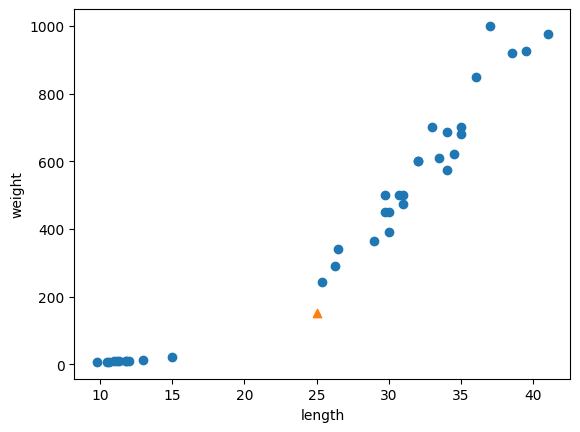

In [47]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show() # 그림을 보면 도미와 가까워보여 도미같지만 빙어라고 예측하고있다.

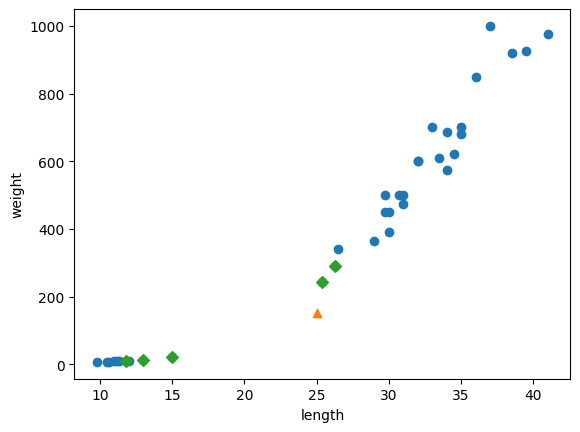

In [48]:
distances, indexes = kn.kneighbors([[25, 150]]) # 생선데이터를 가장가까운 5개의 샘플데이터와의 거리와 인덱스를 반환해준다
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show() # 초록색 마름모 가까운 샘플데이터 주황색 세모 넣어준 데이터

### 기준을 맞춰라

In [49]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 13.   12.2]
  [ 26.3 290. ]
  [ 11.8  10. ]]]


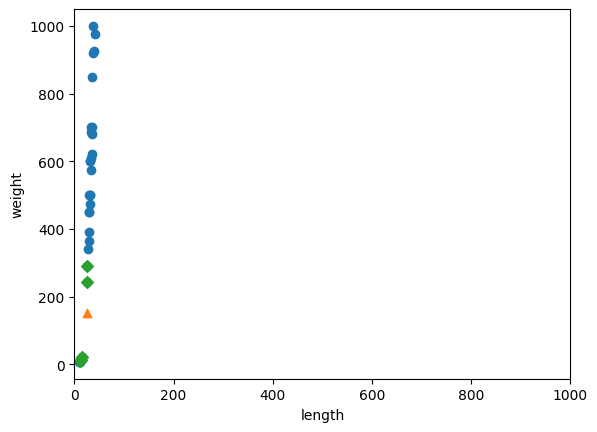

In [50]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0, 1000)) # x, y축의 스케일을 맞춰줘서 표현
plt.xlabel('length') # 해석을 해보면 무게가 생선을 구분하는데 제일 큰 영향이 있고 길이는 영향이 없다는 것을 알 수 있다.
plt.ylabel('weight') # k-최근접이웃은 특성의 스케일을 맞춰주는 작업이 중요한 알고리즘이었다는 것을 알 수 있다.
plt.show()

### 표준 점수로 바꾸기

In [51]:
mean = np.mean(train_input, axis=0) # 평균 / axis 축을 0으로 설정 행을따라 각 열의 통계 값을 계산한다. axis가 1이면 각각 행의 평균을 구해버리게 된다.
std = np.std(train_input, axis=0) # 표준편차 / 특성(열) 마다의 평균을 구하는 것이므로 axis = 0으로 설정
print(mean, std)

[ 26.175      418.08888889] [ 10.21073441 321.67847023]


In [52]:
train_scaled = (train_input - mean) / std

### 전처리 데이터로 모델 훈련하기

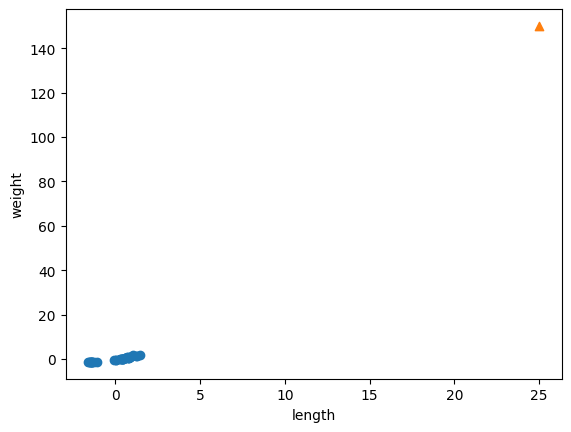

In [53]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show() #훈련 세트를 정규화 시켜줬는데 수상한 도미의 값은 정규화가 되지 않았기 때문에 아래의 그림과 같이 보인다.

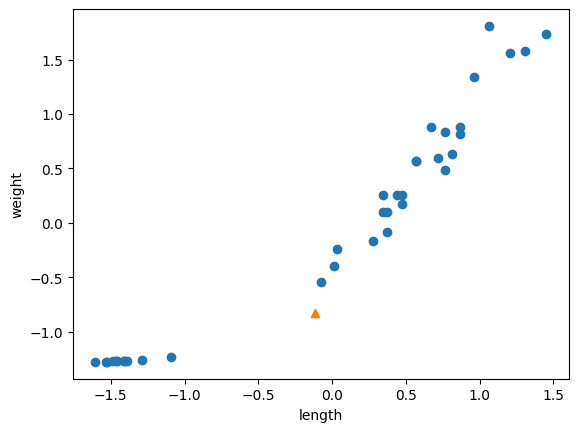

In [54]:
new = ([25, 150] - mean) / std # 수상한 데이터도 정규화 해주기
plt.scatter(train_scaled[:,0], train_scaled[:,1]) # 정규화를 해줄때 훈련데이터의 평균과 표준편차를 사용해야한다. 그렇지 않으면 훈련데이터로 훈련한 의미가 없어진다.
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show() # 아래의 그림처럼 

### 전처리 데이터에서 모델 훈련

In [55]:
kn.fit(train_scaled, train_target)

test_scaled = (test_input - mean) / std # 테스트 input도 정규화 처리시 훈련 모델의 평균과 표준편차 사용
kn.score(test_scaled, test_target)

1.0

In [56]:
print(kn.predict([new])) # 도미라고 정확히 예측

[1.]


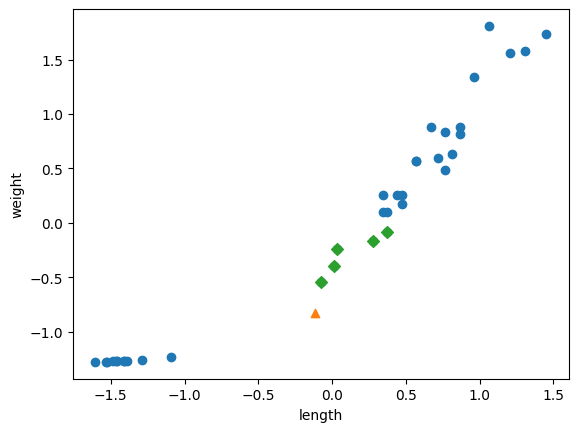

In [57]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# <03-1. 회귀 알고리즘과 모델 규제>

### k-최근접 이웃 회귀

농어의 길이만 사용

In [58]:
import numpy as np
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

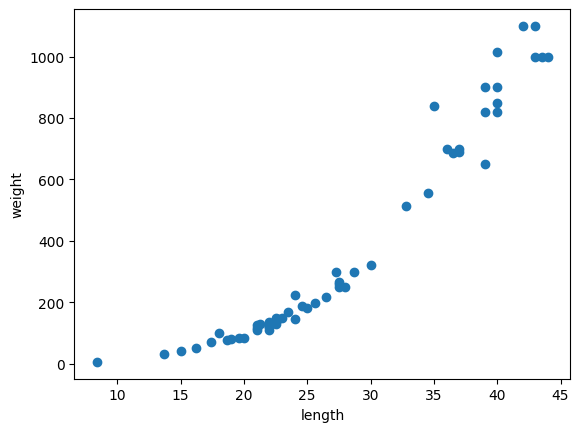

In [59]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

훈련세트준비

In [60]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split( #사이킷런의 모델은 입력데이터가 2차원 배열이라고 기대하고 있다.
    perch_length, perch_weight, random_state=42) # 준비한 train_input과 test_input은 1차원배열이기 때문에
print(train_input.shape, test_input.shape) 

(42,) (14,)


In [61]:
train_input = train_input.reshape(-1, 1) # 배열을 바꿀때 넘파이의 reshape 메소드를 자주 사용한다.
test_input = test_input.reshape(-1, 1) # 두번째 차원을 1로 두면 하나의 열이있는 2차원 배열이 만들어지게된다.
# 열이 하나이고 행 방향 개수는 남은 차원을 다 사용하겠다는 뜻 reshape(-1,1) ==> 크기는 3,1 이 된다.

### 회귀 모델 훈련

In [62]:
from sklearn.neighbors import KNeighborsRegressor # 회귀모델 KNeighborsRegressor 분류모델 KNeighborsclassfier
knr = KNeighborsRegressor()
# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target)
knr.score(test_input, test_target) # 분류에서는 정확도를 출력했었다. 하지만 회귀에서는 (결정계수)R^2을 사용해서 모델을 평가하게된다.
                                   # (결정계수)R^2 1에 가까우면 좋은 모델 0으로 가게되면 좋지 않은 모델이라고 평가할 수 있다.

0.992809406101064

In [63]:
from sklearn.metrics import mean_absolute_error # mean_absolute_error평균 제곱근 오차
# 테스트 세트에 대한 예측을 만듭니다
test_prediction = knr.predict(test_input)
# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다
mae = mean_absolute_error(test_target, test_prediction)
print(mae)


19.157142857142862


### 과대적합과 과소적합

In [64]:
print(knr.score(train_input, train_target)) # 모델을 훈련 세트에서 훈련을 시켰기 때문에 훈련세트에서의 점수가 더 높게 나와야 할 것 같지만 테스트 세트에서의 점수가 더 높게 나오게 되었다.
print(knr.score(test_input, test_target)) # 훈련세트 점수 > 테스트 세트 점수 = 훈련세트에 과대적합 되었다.
                                          # 훈련세트 점수 < 테스트 세트 점수 = 훈련세트에 과소적합 되었다.

0.9698823289099254
0.992809406101064


### 이웃 개수 줄이기

In [65]:
# 이웃의 갯수를 3으로 설정합니다
knr.n_neighbors = 3
# 모델을 다시 훈련합니다
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target)) # 두 값이 너무 동떨이지지 않고 같이 꽤 높은 값을 가지는 값이 나와 과대적합과 과소적합되지않았다고 평가할 수 있는 결과값이 나왔다.

0.9804899950518966
0.9746459963987609


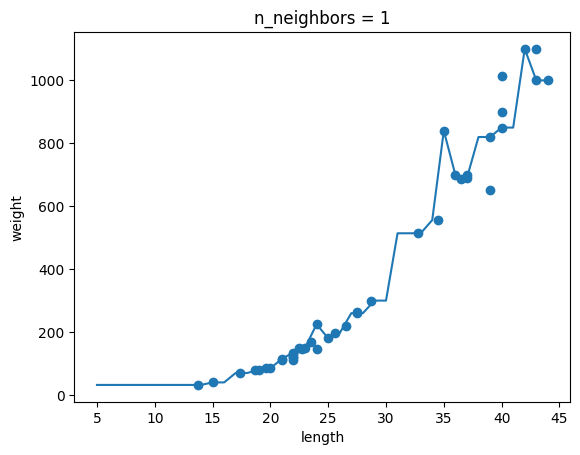

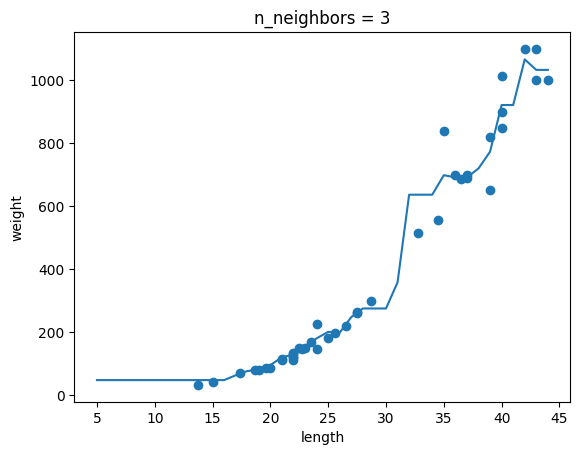

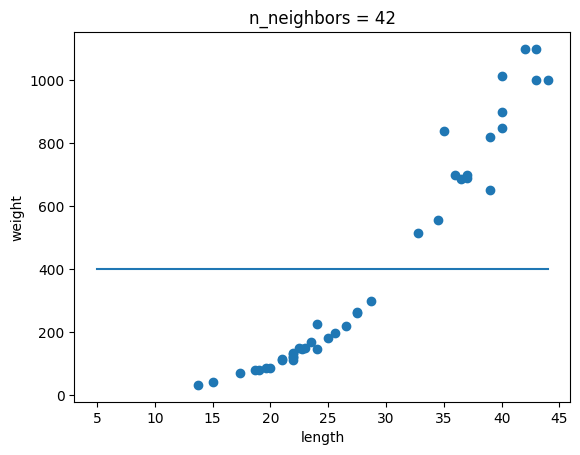

In [66]:
# k-최근접 이웃 회귀 객체를 만듭니다
knr = KNeighborsRegressor()
# 5에서 45까지 x 좌표를 만듭니다
x = np.arange(5, 45).reshape(-1, 1)

# n = 1, 5, 10일 때 예측 결과를 그래프로 그립니다.
for n in [1, 3, 42]:
    # 모델 훈련
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    # 지정한 범위 x에 대한 예측 구하기
    prediction = knr.predict(x)
    # 훈련 세트와 예측 결과 그래프 그리기
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title('n_neighbors = {}'.format(n))
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()

# <03-2. 선형 회귀>

### 아주 큰 농어

In [69]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

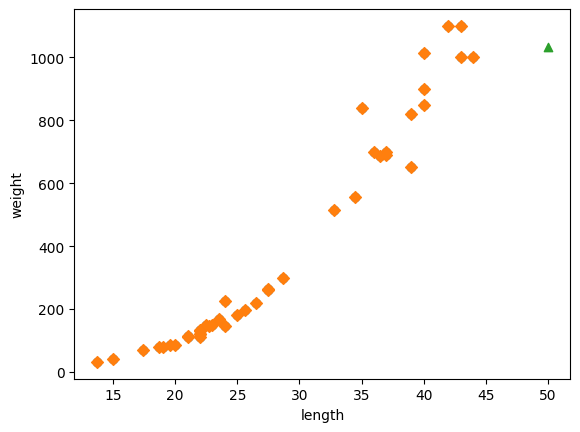

In [ ]:
# 50cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show() # 최근접이웃은 근처에있는 샘플로 예측을 하기때문에 길이가 늘어나도 근처에 있는 샘플의 무게의 최대값을 넘어가지 못한다. 
           # 훈련세트 안에서의 범위 밖으로 나가는 데이터를 예측하기 어렵다는 단점을 가지고 있다.

### 선형 회귀

선형회귀는 특성이 하나인 경우 어떤 직선을 학습하는 알고리즘이다.

In [ ]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)
# 50cm 농어에 대한 예측
print(lr.predict([[50]])) 
print(lr.coef_, lr.intercept_) # 1.2kg으로 나왔다. 

[1241.83860323]
[39.01714496] -709.0186449535477


### 학습한 직선 그리기

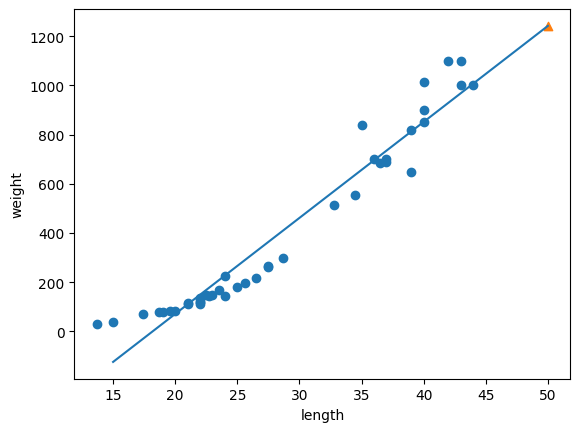

In [ ]:
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 15에서 50까지 1차 방정식 그래프를 그립니다
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight') 
plt.show()

In [ ]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target)) # 훈련데이터에 과대적합되었다고 볼 수 있다.

0.9398463339976041
0.8247503123313559


### 다항 회귀

In [77]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [ ]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [ ]:
print(lr.coef_, lr.intercept_) # 선형식의 절편 확인

[  1.01433211 -21.55792498] 116.05021078278247


### 모델 다시 훈련

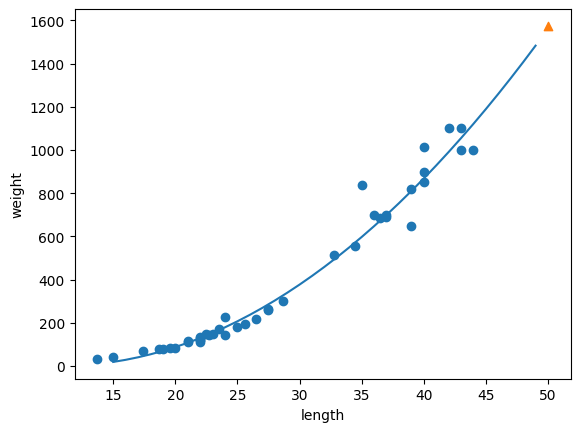

In [ ]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다
point = np.arange(15, 50) # x 축의 포인트 배열 1씩증가하는 배열을 point배열로 만들었다.
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 15에서 49까지 2차 방정식 그래프를 그립니다
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)
# 50cm 농어 데이터
plt.scatter([50], [1574], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target)) # 전반적으로 앞에서 선형회귀때보다 모델의 성능이 높아졌다. 다만, 테스트세트에서 더 점수가 높게 나온 것으로 보아 훈련데이터에서 좀 더 점수가 높게 나오도록 조정이 필요할 것 같다.

0.9706807451768623
0.9775935108325121


# <03-3. 특성 공학과 규제>

### 다중회귀

여러개의 특성을 사용한 선형 회귀를 다중 회귀라고 한다. 2개의 특성을 사용하면 선형회귀는 평면을 학습한다.

판다스로 데이터 준비

In [ ]:
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full) # 판다스는 넘파이 배열과 비슷하게 다차원 배열을 다룰 수 있다. (엑셀과같은)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [ ]:
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

## 다항 특성 만들기

In [ ]:
from sklearn.preprocessing import PolynomialFeatures #PolynomialFeatures을 변환기라고 부름
poly = PolynomialFeatures() # PolynomialFeatures()의 매개변수에는 degree가 있는데 기본값은 2 이다. 제곱을 해주는 것이다.
poly.fit([[2, 3]])

# 1(bias), 2, 3, 2**2, 2*3, 3**2
print(poly.transform([[2, 3]])) # 2,3 이라는 가상의 샘플데이터를 만듬

[[1. 2. 3. 4. 6. 9.]]


In [ ]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

In [ ]:
poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input) # 얻은 배열 train_poly

In [ ]:
print(train_poly.shape) # 42개의 행 9개의 특성이 있음 원래는 길이, 무게 2개의 특성만 있었음

(42, 9)


In [ ]:
poly.get_feature_names_out() # 어떤 특성이 있는 지 확인해보는 코드

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

더 많은 특성 만들기

In [96]:
poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [ ]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target)) # 훈련세트에 과대적합 되었다. 

0.9999999999997811
-144.4051193329733


### 다중 회귀 모델 훈련하기

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982124


### 규제

머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못핟도록 훼방하는 것을 말한다. 즉 모델이 훈련 세트에 과대적합되지 않도록 만드는 것이다.
선형 회귀 모델의 경우 특성에 곱해지는 계수(또는 기울기)의 크기를 작게 만드는 일이다.

규제 전에 표준화

In [98]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

릿지

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge() # Ridge 매개함수에는 알파매개함수가있는데 값을 작게하면 규제가 커지고 값을 작게하면 규제가 작아진다. 정해주는값을 "하이퍼파라미터" 라고 한다.
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


적절한 규제 강도 찾기

In [100]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

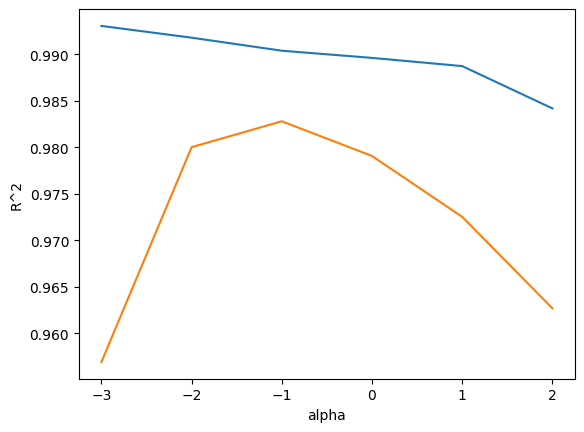

In [101]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [ ]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570365
0.9827976465386943


### 라쏘

In [103]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421886


/Users/kwonminseok/Desktop/K/dankook/4-1/machinlearning/m_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/Users/kwonminseok/Desktop/K/dankook/4-1/machinlearning/m_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


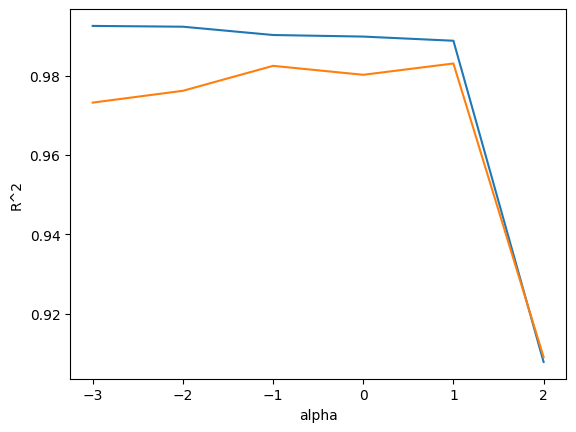

In [104]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델을 훈련합니다
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [105]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131866
0.9824470598706695


In [106]:
print(np.sum(lasso.coef_ == 0))

40
